<a href="https://colab.research.google.com/github/SantiOspina/Inteligencia-Artificial/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rain in Australia**

### *Se importan las Librerias*

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, r2_score
from keras import callbacks
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

### Manejo de datos

In [33]:
df = pd.read_csv("/content/sample_data/Albury.csv") # Importamos el documento
df.head() # Mostramos la tabla

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [3]:
df.drop(['Evaporation','Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm',	'WindGustSpeed',	'Pressure9am',	'Pressure3pm',	'Cloud9am',	'Cloud3pm',	'Temp9am',	'Temp3pm',	'RainToday'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
ind_df = df.set_index(['Date'], drop=True)
ind_df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainTomorrow
Date,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,20.0,24.0,71.0,22.0,0.0
2008-12-02,Albury,7.4,25.1,0.0,4.0,22.0,44.0,25.0,0.0
2008-12-03,Albury,12.9,25.7,0.0,19.0,26.0,38.0,30.0,0.0
2008-12-04,Albury,9.2,28.0,0.0,11.0,9.0,45.0,16.0,0.0
2008-12-05,Albury,17.5,32.3,1.0,7.0,20.0,82.0,33.0,0.0


In [4]:
df_date=df['Date']
df_location=df['Location']
df_MinTemp=df['MinTemp'].fillna(df['MinTemp'].mean())
df_MaxTemp=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df_Rainfall=df['Rainfall'].fillna(df['Rainfall'].mean())
df_Rain=df['RainTomorrow']
df_Rain=df_Rain.fillna(0)
df_wind=(df['WindSpeed9am']+df['WindSpeed3pm'])/2
df_humidity=(df['Humidity9am']+df['Humidity3pm'])/2
df_wind=df_wind.fillna(df_wind.mean())
df_humidity=df_humidity.fillna(df_humidity.mean())
df_in = pd.DataFrame({'Date': df_date, 'Location': df_location, 'MinTemp': df_MinTemp,'MaxTemp':df_MaxTemp,'Rainfall': df_Rainfall, 'Wind': df_wind, 'Humidity': df_humidity,'Rain':df_Rain})
print(df_in)

           Date Location  MinTemp  MaxTemp  Rainfall  Wind  Humidity  Rain
0    2008-12-01   Albury     13.4     22.9       0.6  22.0      46.5   0.0
1    2008-12-02   Albury      7.4     25.1       0.0  13.0      34.5   0.0
2    2008-12-03   Albury     12.9     25.7       0.0  22.5      34.0   0.0
3    2008-12-04   Albury      9.2     28.0       0.0  10.0      30.5   0.0
4    2008-12-05   Albury     17.5     32.3       1.0  13.5      57.5   0.0
...         ...      ...      ...      ...       ...   ...       ...   ...
3035 2017-06-21   Albury      1.2     15.2       0.4   1.0      81.0   0.0
3036 2017-06-22   Albury      0.8     13.4       0.0   3.0      83.0   0.0
3037 2017-06-23   Albury      1.1     11.9       0.0   5.5      90.5   0.0
3038 2017-06-24   Albury      1.1     14.1       0.2   9.5      74.5   0.0
3039 2017-06-25   Albury      3.9     10.9       0.0   3.0      85.0   1.0

[3040 rows x 8 columns]


In [5]:
df_in.to_csv('Datos.csv',index=False)

### Analisis de datos 

In [34]:
Analisis = pd.read_csv("/content/Datos.csv")

In [7]:
print(Analisis.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Wind  Humidity  Rain
0  2008-12-01   Albury     13.4     22.9       0.6  22.0      46.5   0.0
1  2008-12-02   Albury      7.4     25.1       0.0  13.0      34.5   0.0
2  2008-12-03   Albury     12.9     25.7       0.0  22.5      34.0   0.0
3  2008-12-04   Albury      9.2     28.0       0.0  10.0      30.5   0.0
4  2008-12-05   Albury     17.5     32.3       1.0  13.5      57.5   0.0


In [8]:
Analisis.drop(['Location'], axis=1, inplace=True)
Analisis['Date'] = pd.to_datetime(Analisis['Date'])
Data = Analisis.set_index(['Date'], drop=True)
Data.head()

,MinTemp,MaxTemp,Rainfall,Wind,Humidity,Rain
Date,,,,,,
2008-12-01,13.4,22.9,0.6,22.0,46.5,0.0
2008-12-02,7.4,25.1,0.0,13.0,34.5,0.0
2008-12-03,12.9,25.7,0.0,22.5,34.0,0.0
2008-12-04,9.2,28.0,0.0,10.0,30.5,0.0
2008-12-05,17.5,32.3,1.0,13.5,57.5,0.0


### Graficas del dataset

Text(0.5, 1.0, 'MinTemp')

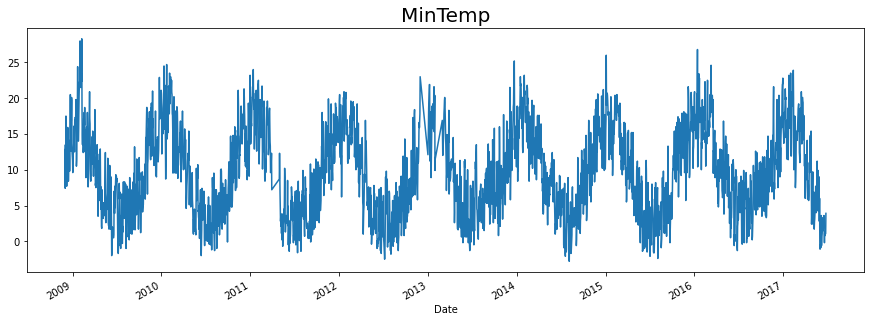

In [9]:
Data = Data.sort_index()
plt.figure(figsize=(15, 5))
Data['MinTemp'].plot();
plt.title('MinTemp',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'MaxTemp')

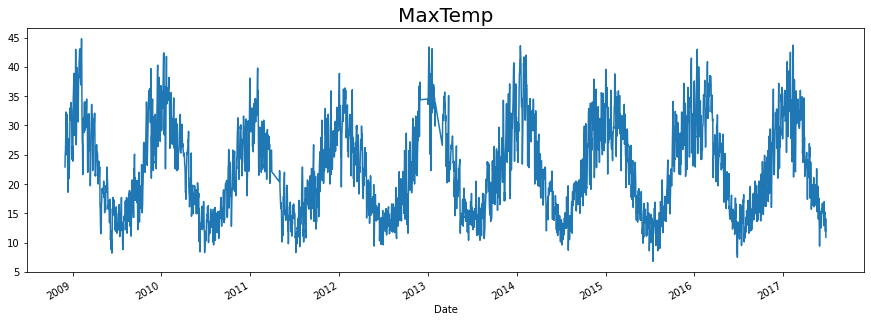

In [10]:
Data = Data.sort_index()
plt.figure(figsize=(15, 5))
Data['MaxTemp'].plot();
plt.title('MaxTemp',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Rainfall')

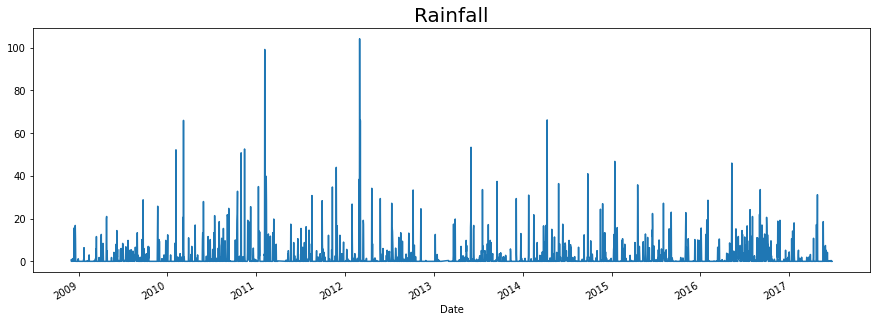

In [11]:
Data = Data.sort_index()
plt.figure(figsize=(15, 5))
Data['Rainfall'].plot();
plt.title('Rainfall',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Wind')

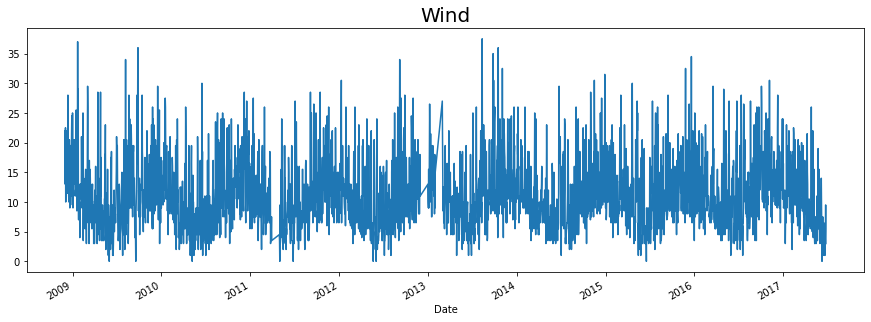

In [12]:
Data = Data.sort_index()
plt.figure(figsize=(15, 5))
Data['Wind'].plot();
plt.title('Wind',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Humidity')

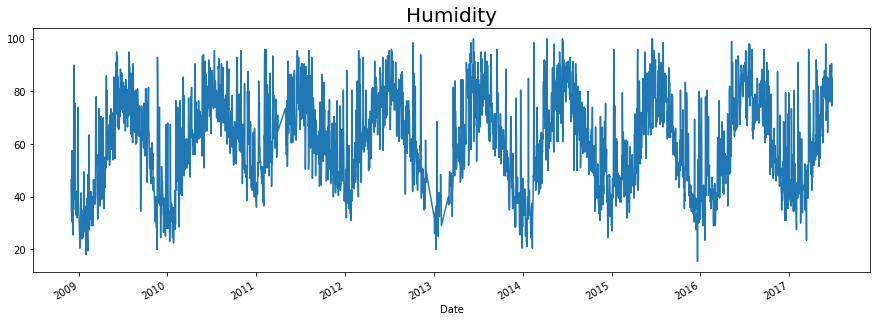

In [13]:
Data = Data.sort_index()
plt.figure(figsize=(15, 5))
Data['Humidity'].plot();
plt.title('Humidity',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Rain')

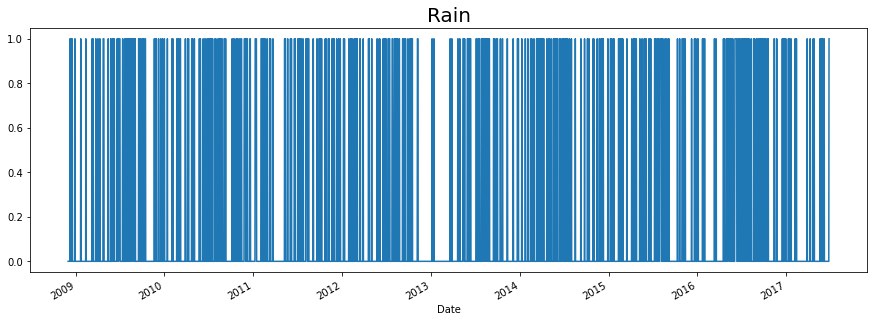

In [14]:
Data = Data.sort_index()
plt.figure(figsize=(15, 5))
Data['Rain'].plot();
plt.title('Rain',loc='center',fontsize=20,color="black")

### Graficas del dataset partido en train y test

In [15]:
par=2497
train=Analisis.loc[:par]
test=Analisis.loc[par+1:]
train_MinTemp=train['MinTemp']
test_MinTemp=test['MinTemp']
train_MaxTemp=train['MaxTemp']
test_MaxTemp=test['MaxTemp']
train_Rainfall=train['Rainfall']
test_Rainfall=test['Rainfall']
train_Wind=train['Wind']
test_Wind=test['Wind']
train_Humidity=train['Humidity']
test_Humidity=test['Humidity']
train_Rain=train['Rain']
test_Rain=test['Rain']

Text(0.5, 1.0, 'MinTemp')

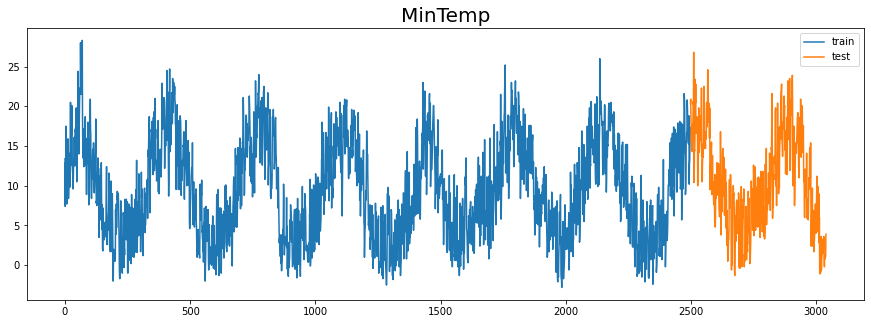

In [16]:
plt.figure(figsize=(15, 5))
ax = train_MinTemp.plot()
test_MinTemp.plot(ax=ax)
plt.legend(['train', 'test']);
plt.title('MinTemp',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'MaxTemp')

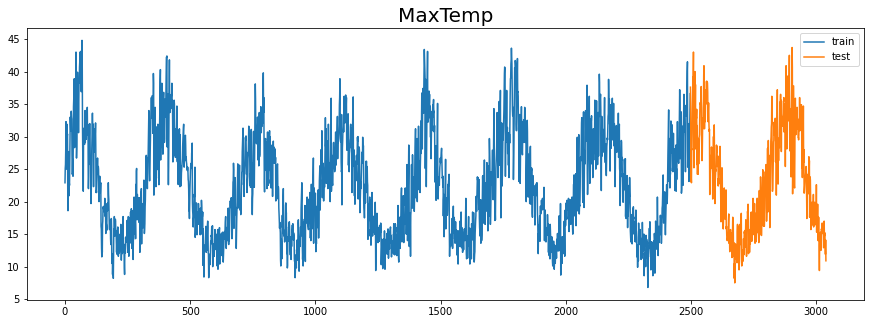

In [17]:
plt.figure(figsize=(15, 5))
ax = train_MaxTemp.plot()
test_MaxTemp.plot(ax=ax)
plt.legend(['train', 'test']);
plt.title('MaxTemp',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Rainfall')

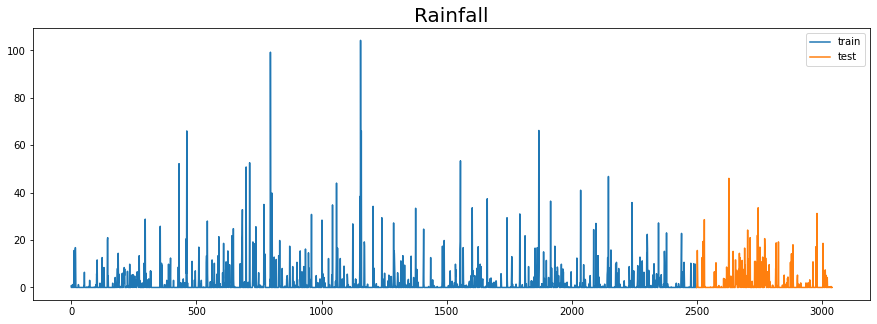

In [18]:
plt.figure(figsize=(15, 5))
ax = train_Rainfall.plot()
test_Rainfall.plot(ax=ax)
plt.legend(['train', 'test']);
plt.title('Rainfall',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Wind')

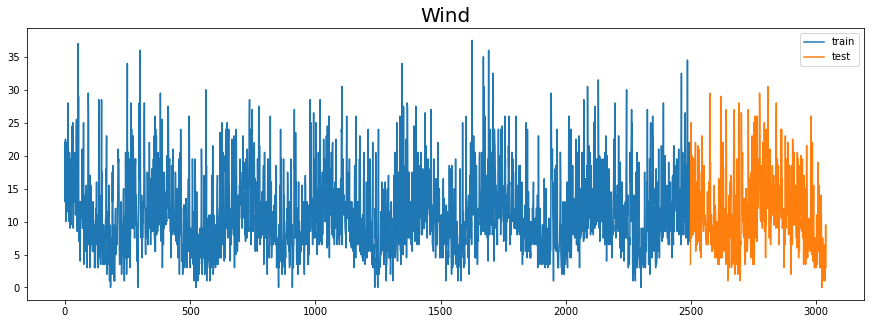

In [19]:
plt.figure(figsize=(15, 5))
ax = train_Wind.plot()
test_Wind.plot(ax=ax)
plt.legend(['train', 'test']);
plt.title('Wind',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Humidity')

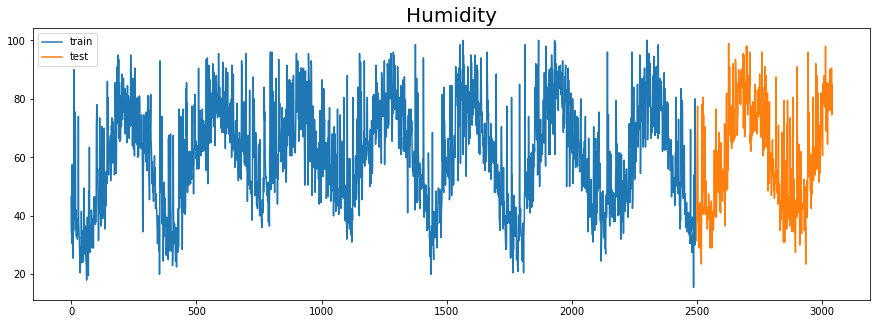

In [20]:
plt.figure(figsize=(15, 5))
ax = train_Humidity.plot()
test_Humidity.plot(ax=ax)
plt.legend(['train', 'test']);
plt.title('Humidity',loc='center',fontsize=20,color="black")

Text(0.5, 1.0, 'Rain')

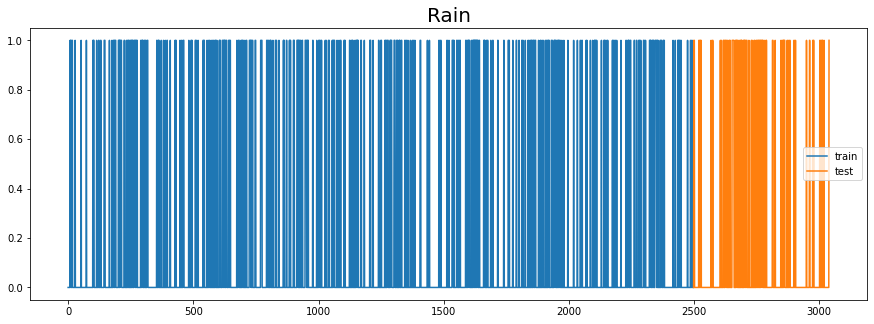

In [21]:
plt.figure(figsize=(15, 5))
ax = train_Rain.plot()
test_Rain.plot(ax=ax)
plt.legend(['train', 'test']);
plt.title('Rain',loc='center',fontsize=20,color="black")

### Prediccion a 5 pasos

In [22]:
Train = pd.DataFrame({'MinTempTrain': train_MinTemp,'MaxTempTrain':train_MaxTemp,'RainfallTrain': train_Rainfall, 'WindTrain': train_Wind, 'HumidityTrain': train_Humidity,'RainTrain':train_Rain})
Test = pd.DataFrame({'MinTempTest': test_MinTemp,'MaxTempTest':test_MaxTemp,'RainfallTest': test_Rainfall, 'WindTest': test_Wind, 'HumidityTest': test_Humidity,'RainTest':test_Rain})

#### Train

In [35]:
Train_sin_y = Train.copy()
YTrain = Train_sin_y[['RainTrain']]
Train_sin_y = Train_sin_y.drop(['RainTrain'], axis = 1)
YTrain = YTrain[5:]

nueva_matriz = []
Train_copia = Train_sin_y.copy()
a,b = Train_sin_y.shape #(filas,columnas)
for i in range(0,b):
  nueva_matriz.append(Train_copia[i:a-b+i])

x_0 = nueva_matriz[0]
x_1 = nueva_matriz[1]
x_2 = nueva_matriz[2]
x_3 = nueva_matriz[3]
x_4 = nueva_matriz[4]

x_1.index = x_0.index
x_2.index = x_0.index
x_3.index = x_0.index
x_4.index = x_0.index
YTrain.index = x_0.index

x_0 = x_0.join(x_1, lsuffix='_x_0', rsuffix='_x_1')
x_0 = x_0.join(x_2, lsuffix='', rsuffix='_x_2')
x_0 = x_0.join(x_3, lsuffix='', rsuffix='_x_3')
x_0 = x_0.join(x_4, lsuffix='', rsuffix='_x_4')
XTrain=x_0.copy()
XTrain=XTrain.to_numpy()
YTrain=YTrain.to_numpy()

#### Test

In [36]:
Test_sin_y = Test.copy()
YTest = Test_sin_y[['RainTest']]
Test_sin_y = Test_sin_y.drop(['RainTest'], axis = 1)
YTest = YTest[5:]

nueva_matriz = []
Test_copia = Test_sin_y.copy()
a,b = Test_sin_y.shape #(filas,columnas)
for i in range(0,b):
  nueva_matriz.append(Test_copia[i:a-b+i])

x_0 = nueva_matriz[0]
x_1 = nueva_matriz[1]
x_2 = nueva_matriz[2]
x_3 = nueva_matriz[3]
x_4 = nueva_matriz[4]

x_1.index = x_0.index
x_2.index = x_0.index
x_3.index = x_0.index
x_4.index = x_0.index
#YTest.index = x_0.index

x_0 = x_0.join(x_1, lsuffix='_x_0', rsuffix='_x_1')
x_0 = x_0.join(x_2, lsuffix='', rsuffix='_x_2')
x_0 = x_0.join(x_3, lsuffix='', rsuffix='_x_3')
x_0 = x_0.join(x_4, lsuffix='', rsuffix='_x_4')
XTest=x_0.copy()
XTest=XTest.to_numpy()

In [37]:
print(XTrain.shape)
print(YTrain.shape)
print(XTest.shape)
print(YTest.shape)

(2493, 25)
(2493, 1)
(537, 25)
(537, 1)


### Red Neuronal

In [38]:
# Early stopping

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# Layers

model.add(Dense(units = 300, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 25))
model.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(units = 75, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN

history = model.fit(XTrain, YTrain, batch_size = 30, epochs = 500, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/500
67/67 [==============================] - 1s 8ms/step - loss: 0.6469 - accuracy: 0.7896 - val_loss: 0.6391 - val_accuracy: 0.8216
Epoch 2/500
67/67 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.7756 - val_loss: 0.6362 - val_accuracy: 0.8216
Epoch 3/500
67/67 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.8058 - val_loss: 0.6331 - val_accuracy: 0.8216
Epoch 4/500
67/67 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.7937 - val_loss: 0.6300 - val_accuracy: 0.8216
Epoch 5/500
67/67 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7989 - val_loss: 0.6269 - val_accuracy: 0.8216
Epoch 6/500
67/67 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.7923 - val_loss: 0.6236 - val_accuracy: 0.8216
Epoch 7/500
67/67 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.7939 - val_loss: 0.6204 - val_accuracy: 0.8216
Epoch 8/500
6

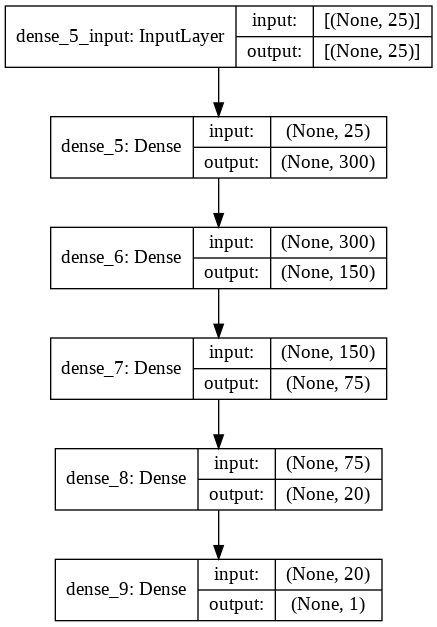

In [39]:
plot_model(model, to_file="modelo.png",show_shapes=True)

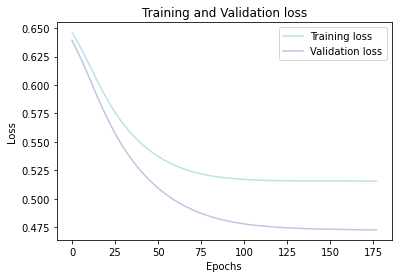

In [40]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

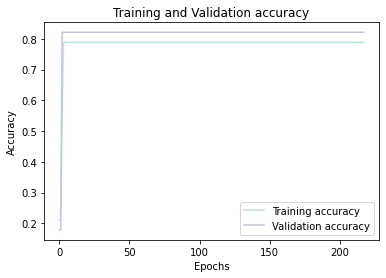

In [31]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()